<a href="https://colab.research.google.com/github/Alanthomas-2209/DATA-SCIENCE-LAB/blob/main/Series_Exam/LabExam(NB).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

In [99]:
data = pd.read_csv('titanic.csv')

In [100]:
data = data.drop(["PassengerId","Name"],axis=1)

In [101]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,1,3,female,47.0,1,0,363272,7.0000,NaN,S
2,0,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,0,3,male,27.0,0,0,315154,8.6625,NaN,S
4,1,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [102]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [103]:
data = data.dropna()
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [104]:
data.tail()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
404,0,1,male,43.0,1,0,17765,27.7208,D40,C
405,0,2,male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C
407,0,1,male,50.0,1,1,113503,211.5000,C80,C
411,1,1,female,37.0,1,0,19928,90.0000,C78,Q
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C


In [105]:

encoder = LabelEncoder()
data['Ticket'] =  encoder.fit_transform(data['Ticket'])
data['Cabin'] =  encoder.fit_transform(data['Cabin'])
data['Embarked'] =  encoder.fit_transform(data['Embarked'])
data['Sex'] =  encoder.fit_transform(data['Sex'])
# X_encoded = pd.get_dummies(X, columns=['Ticket'])


In [106]:
X = data.drop("Survived", axis = 1)
X

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
12,1,0,23.0,1,0,32,82.2667,12,2
14,1,0,47.0,1,0,65,61.1750,58,2
24,1,0,48.0,1,3,53,262.3750,15,0
26,1,0,22.0,0,1,9,61.9792,10,0
28,1,1,41.0,0,0,7,30.5000,2,2
...,...,...,...,...,...,...,...,...,...
404,1,1,43.0,1,0,28,27.7208,56,0
405,2,1,20.0,0,0,63,13.8625,55,0
407,1,1,50.0,1,1,8,211.5000,42,0
411,1,0,37.0,1,0,30,90.0000,41,1


In [107]:
y = data["Survived"]
y

12     1
14     1
24     1
26     1
28     0
      ..
404    0
405    0
407    0
411    1
414    1
Name: Survived, Length: 87, dtype: int64

In [108]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [113]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.2, random_state=33)

In [114]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [115]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy",accuracy)

Accuracy 1.0


Text(0.5, 1.0, 'Confusion Matrix')

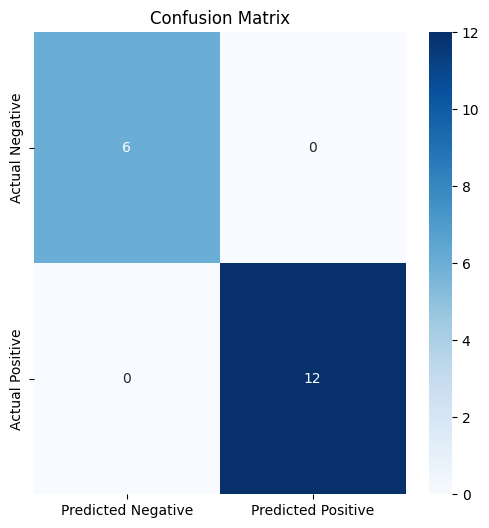

In [116]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize = (6,6))
# sns.heatmap(cm, annot = True, cmap = "Greens", xticklabels=np.unique(y),yticklabels=np.unique(y))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])

plt.title("Confusion Matrix")
# plt.xlable("Actual")
# plt.ylabel("Predicted")
# plt.show()